In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [167]:
train_house = pd.read_csv("train.csv")
test_house = pd.read_csv("test.csv")

In previous projects I cleaned the two datasets separately, this time I will do it both together


In [168]:
train_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [169]:
#display(train_house.info())

### 1. Dealing with missing data

For numerical data, I will fill with np.mean()
For object data I will fill with "pad" which propagate the last valid. Then I will pass it to category type ("pad" = "ffill")

For the test_house, I will use a different approach

#### 1.1 Cleaning Train data set

In [170]:
train_house = train_house.fillna({"LotFrontage":np.mean(train_house.LotFrontage)})
assert train_house["LotFrontage"].isna().sum() == 0

In [171]:
#For the Alley, the Nan indicates the absence of it, so it's not a missing value but let's replace it with something different
train_house = train_house.fillna({"Alley":"None"})
assert train_house["Alley"].isna().sum() == 0

In [172]:
train_house["MasVnrType"].fillna(method = "pad",inplace = True)
train_house = train_house.fillna({"MasVnrArea":np.mean(train_house.MasVnrArea)})
assert train_house["MasVnrType"].isna().sum() == 0

In [173]:
cols_to_fill = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
for col in cols_to_fill:
    train_house = train_house.fillna({col:"None"})
    
train_house["Electrical"].fillna(method = "pad", inplace = True)

In [174]:
#The missing vaules in the "FireplaceQu" represents that there is not fire place. 
train_house = train_house.fillna({"FireplaceQu":"None"})
assert train_house["FireplaceQu"].isna().sum() == 0

In [175]:
cols_to_fill_2 = ["GarageType","GarageFinish","GarageQual","GarageCond"]
for cols_2 in cols_to_fill_2:
    train_house = train_house.fillna({cols_2:"None"})
    
#GarageYrBlt is a particular case bc the missing values represent No Garage
train_house = train_house.fillna({"GarageYrBlt":0})

In [176]:
train_house = train_house.fillna({"PoolQC":"None"})
train_house = train_house.fillna({"Fence":"None"})
train_house = train_house.fillna({"MiscFeature":"None"})

In [177]:
#train_house.info() # No missing values

In [178]:
print(train_house.shape)

(1460, 81)


#### 1.2 Cleaning Test data set

In [179]:
test_house
test_house_to_change = test_house.copy()

In [180]:
#test_house.info() #There has to be 1459

In [181]:
test_house_to_change["MSZoning"].fillna(method = "pad", inplace = True)

In [182]:
test_house_to_change = test_house_to_change.fillna({"LotFrontage":np.mean(test_house.LotFrontage)})

In [183]:
#Lets fill all those NaN that are actually not missing values but they are the absences of... 
to_none = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu"
           ,"GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
for _ in to_none:
    test_house_to_change = test_house_to_change.fillna({_:"None"})
    

In [184]:
test_house_to_change = test_house_to_change.fillna({"GarageYrBlt":0})

In [185]:
#the reamings one even if they are numerical lets just "ffill" them
test_house_to_change.fillna(method = "ffill", inplace = True)

In [186]:
#test_house.info() #No more missing values.

In [187]:
print(test_house_to_change.shape)

(1459, 80)


In [188]:
del(train_house["Id"])
del(test_house_to_change["Id"])
print(train_house.shape)
print(test_house_to_change.shape)

(1460, 80)
(1459, 79)


In [189]:
#I dont like to manipulate the originals dataframes
train_house_copy = train_house.copy()
test_house_copy = test_house_to_change.copy()

In [190]:
house_train_du = pd.get_dummies(train_house_copy)
house_train_du.shape

(1460, 303)

In [191]:
house_set_du = pd.get_dummies(test_house_copy)
house_set_du.shape

(1459, 284)

### 2. Feature Selection   

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [193]:
SEED = 42

In [194]:
y = house_train_du["SalePrice"].values
X = house_train_du.drop("SalePrice",axis = 1).values

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

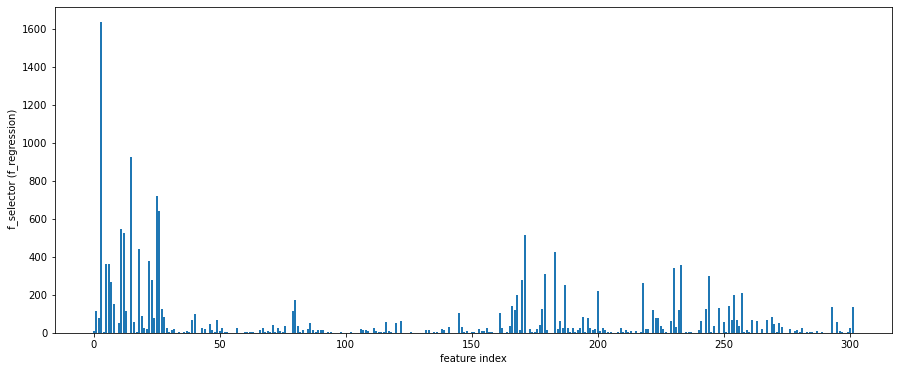

In [196]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k="all") #K, how many features do i wanna select 

# learn relationship from training data
f_selector.fit(X_train, y_train)

# Plot the scores for the features
plt.figure(figsize=(15,6))
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel(" f_selector (f_regression)")
plt.show()

In [197]:
f_count = 0
for f in f_selector.scores_:
    if f >= 200:
        f_count += 1
print("there are {} relevant features".format(f_count))

there are 24 relevant features


In [198]:
f_selector_best = SelectKBest(score_func=f_regression, k=24)
X_new_train = f_selector_best.fit_transform(X_train,y_train)
X_new_train.shape

(1022, 24)

For the feature selection, I first used SelectKBest with "all" features as K to check which were the scores. After plot it
I realized the were 24 features with a K score_ bigger than 200 so I reduced the features to 24. All this using regression as the score_func

In [199]:
display(f_selector_best.get_support(indices = True)) #This are the 24 features I need

array([  3,   5,   6,   7,  11,  12,  15,  18,  22,  23,  25,  26, 168,
       170, 171, 179, 183, 187, 200, 218, 230, 233, 244, 257], dtype=int64)

In [200]:
most_important_features = list(house_train_du.iloc[:0,f_selector_best.get_support(indices = True)].columns)
most_important_features #I need this list to apply in the dataset to predict

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'Foundation_CBlock',
 'Foundation_Wood',
 'BsmtQual_None',
 'BsmtFinType1_BLQ',
 'Heating_Wall',
 'Electrical_SBrkr',
 'KitchenQual_Gd',
 'FireplaceQu_Gd',
 'GarageFinish_RFn']

In [201]:
X_new_test = X_test[:,f_selector_best.get_support(indices = True)]
X_new_test.shape

(438, 24)

### 3. Modelling

#### 3.1 Simple Linear Regression

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

In [203]:
linear = LinearRegression()
linear.fit(X_new_train,y_train)
y_pred_1 = linear.predict(X_new_test)
print(np.sqrt(MSE(y_test,y_pred_1))) #big error 

33206.53372063101


In [204]:
X_to_predict = house_set_du[most_important_features].values

In [205]:
y_pred_linear = linear.predict(X_to_predict)
to_report_linear = pd.DataFrame({'Id': test_house.Id, 'SalePrice': y_pred_linear})
#to_report_linear.to_csv("submission_1.csv",index = False)

First Kaggle submission = 0.22150 the idea is to minimize it as close as possible to 0

#### 3.2 Desicion Tree Regressor


In [206]:
from sklearn.tree import DecisionTreeRegressor

In [207]:
d_tree = DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 0.025, random_state = SEED)
d_tree.fit(X_new_train,y_train)
y_pred_2 = d_tree.predict(X_new_test)
print(np.sqrt(MSE(y_test,y_pred_2)))  #the error did not reduced, but the submission had an improvement

37623.56950305571


In [208]:
y_pred_d_tree = d_tree.predict(X_to_predict)
to_report_d_tree = pd.DataFrame({'Id': test_house.Id, 'SalePrice': y_pred_d_tree})
#to_report_d_tree.to_csv("submission_2.csv",index = False)

Second Kaggle submission = 0.20868 the idea is to minimize it as close as possible to 0